# GROUP 4 PHASE 2 PROJECT



# 1.0 Project Overview 
With the rise of original video content among major corporations, our company has decided to establish its own movie studio. However, since we lack experience in film production, it is crucial to understand current trends to make informed decisions.



## 1.1 Business Understanding
As part of the 5 year corporate strategy roll out,our company has identified an expansion opportuntiy.
The company wants  to  venture in  original video content creation through their new studio.
The company management has an interest in utising data on films at  the box office to identify  best movies. 
From the best movies, the company management is loking for insights that will influence the investment approach to take.

## 1.2 Objectives:
This project aims to analyze the types of films that are currently performing best at the box office. By gathering and interpreting key market data, we will provide actionable insights to guide the company’s movie studio in selecting genres, themes, and storytelling approaches that maximize commercial success. The findings will help shape our content strategy, ensuring that our productions align with audience preferences and industry trends.
Our review is focused on identifying the below factors that would influence the market penetration strategy:

	Identifying the top 10 best performing genres based on the return on investment and sales.  
	Identifying the top 10 best performing gmovies based on the return on investment and sales.  
	Identifying  relationship between production cost and the global film sales.    
	Identifying the impact of movie rating on the global film sales.   



# 2.0 Data exploration
The data was obtained form the below sources:  
Box Office Mojo: https://www.boxofficemojo.com/  
IMDB : https://www.imdb.com/  
The Rotten Tomatoes : https://www.rottentomatoes.com/   
The Movie DB: https://www.themoviedb.org/  
The numbers: https://www.the-numbers.com/  




## 2.1 loading applications and data

In [32]:
# Loading required packages for analysis:
import sqlite3
import pandas as pd
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [33]:
#Accessing data in sql database:
conn = sqlite3.connect("im.db")

In [34]:
#Viewing movie info data in sql:
movie_info = pd.read_csv('rt.movie_info.tsv', delimiter='\t')
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


The table has 1560 entries with some columns such as studio and currency having null values

In [35]:
#Viewing movie reviews data
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding='latin1')
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [36]:
#merging movie info and movie reviews based on id:
merged_movies_reviews = pd.merge(movie_info, rt_reviews, on="id", how="inner")
merged_movies_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   synopsis      54300 non-null  object
 2   rating_x      54346 non-null  object
 3   genre         54345 non-null  object
 4   director      48992 non-null  object
 5   writer        45206 non-null  object
 6   theater_date  53206 non-null  object
 7   dvd_date      53206 non-null  object
 8   currency      33310 non-null  object
 9   box_office    33310 non-null  object
 10  runtime       53594 non-null  object
 11  studio        40125 non-null  object
 12  review        48869 non-null  object
 13  rating_y      40915 non-null  object
 14  fresh         54432 non-null  object
 15  critic        51710 non-null  object
 16  top_critic    54432 non-null  int64 
 17  publisher     54123 non-null  object
 18  date          54432 non-null  object
dtypes: i

In [37]:
#To access movie basis in SQL
q = (""" SELECT * FROM movie_basics""")
movies = pd.read_sql(q,conn)
movies.head(2)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [38]:
#getting a summary of movie basics:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [39]:
#viewing the colums
movies.columns


Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [40]:
#accesing movie ratings:
q1 = ("""SELECT * FROM movie_ratings""")
movie_ratings = pd.read_sql(q1,conn)
movie_ratings.head(2)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [41]:
movie_ratings.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [42]:
# Merging tables - move basics and Movie ratings
k = (""" SELECT m.movie_id, m.primary_title,m.original_title,m.start_year,m.runtime_minutes, m.genres, r.averagerating,r.numvotes
FROM movie_basics m inner JOIN movie_ratings r on m.movie_id=r.movie_id
""")
movie_details = pd.read_sql(k,conn)
movie_details.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


In [43]:
movie_budget = pd.read_csv("tn.movie_budgets.csv")
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [44]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [45]:
movie_budget["production_budget"] = movie_budget["production_budget"].replace(r'[\$,]', '', regex=True).astype(float)
movie_budget["domestic_gross"] = movie_budget["domestic_gross"].replace(r'[\$,]', '', regex=True).astype(float)
movie_budget["worldwide_gross"] = movie_budget["worldwide_gross"].replace(r'[\$,]', '', regex=True).astype(float)
movie_budget.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09


In [46]:
# TO MERGE MOVIE DETAILS WITH BUDGET:
movie_details_and_budget = movie_details.merge(movie_budget, left_on="primary_title", right_on="movie", how="inner")
movie_details_and_budget = movie_details_and_budget.drop(columns=["movie"], errors="ignore")
#adding column net revenue
movie_details_and_budget['Net_profit']=(movie_details_and_budget['worldwide_gross']-movie_details_and_budget['production_budget'])
#adding columnnet ROI:
movie_details_and_budget['ROI']=((movie_details_and_budget['Net_profit']/movie_details_and_budget['production_budget'])*100)

movie_details_and_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2875 non-null   object 
 1   primary_title      2875 non-null   object 
 2   original_title     2875 non-null   object 
 3   start_year         2875 non-null   int64  
 4   runtime_minutes    2757 non-null   float64
 5   genres             2867 non-null   object 
 6   averagerating      2875 non-null   float64
 7   numvotes           2875 non-null   int64  
 8   id                 2875 non-null   int64  
 9   release_date       2875 non-null   object 
 10  production_budget  2875 non-null   float64
 11  domestic_gross     2875 non-null   float64
 12  worldwide_gross    2875 non-null   float64
 13  Net_profit         2875 non-null   float64
 14  ROI                2875 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 337.0+ KB


In [47]:
movie_details_and_budget.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,Net_profit,ROI
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",45000000.0,0.0,73706.0,-44926294.0,-99.836209
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015",200000.0,1109808.0,1165996.0,965996.0,482.998000


## 2.2 summarizing data and visualizing summaries 

### Sumamry by top 10 genres in sales and ROI


In [48]:
# Getting top 10 genres by ROI:
ROI_by_Genre=movie_details_and_budget.groupby ('genres')['ROI'].mean().sort_values(ascending=False).head(10).reset_index()
ROI_by_Genre.head(10)

,genres,ROI
0,"Biography,Documentary",5261.664891
1,"Drama,Family,Fantasy",4726.022386
2,"Crime,Drama,Family",3352.968572
3,"Action,Drama,Romance",2946.752319
4,"Action,Comedy,Drama",2904.559978
5,"Horror,Romance,Thriller",2617.924114
6,"Horror,Mystery,Thriller",2180.539777
7,Crime,1905.581424
8,"Crime,Fantasy,Thriller",1853.445161
9,"Comedy,Romance,Sport",1822.413649


In [49]:
# Getting top 10 genres by sales:
Top10_genres_by_sales=movie_details_and_budget.groupby ('genres')['worldwide_gross'].mean().sort_values(ascending=False).head(10).reset_index()
Top10_genres_by_sales.head(10)

,genres,worldwide_gross
0,"Adventure,Drama,Sport",1.272470e+09
1,"Fantasy,Romance",1.272470e+09
2,"Family,Fantasy,Musical",9.338154e+08
3,"Adventure,Fantasy",7.012107e+08
4,"Action,Adventure,Sci-Fi",5.991302e+08
5,"Fantasy,Musical",5.127456e+08
6,"Adventure,Drama,Sci-Fi",4.405503e+08
7,"Action,Adventure,Animation",4.374047e+08
8,"Biography,Documentary,History",4.299082e+08
9,"Adventure,Mystery,Sci-Fi",4.024483e+08


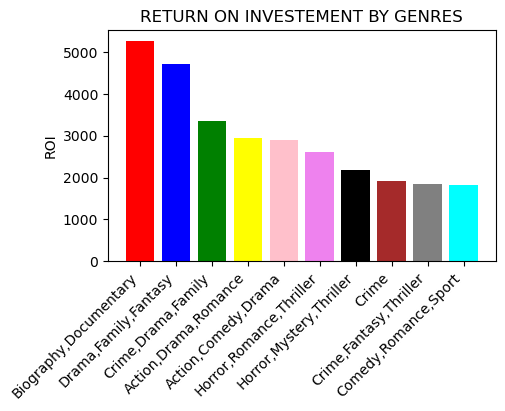

In [50]:
# summary of ROI per genre:
fig, ax = plt.subplots(figsize=(5,3))
ax.bar(ROI_by_Genre['genres'],ROI_by_Genre['ROI'],color=['red', 'blue', 'green', 'yellow', 'pink', 
                                 'violet', 'black', 'brown', 'grey', 'cyan'])
ax.set_ylabel('ROI')
ax.set_title('RETURN ON INVESTEMENT BY GENRES')
plt.xticks(rotation=45,ha='right')
plt.show()

All the top 10 genres have a retun on investement of over 1000%. The most profitable genre to invest in is Biography,Documentary.

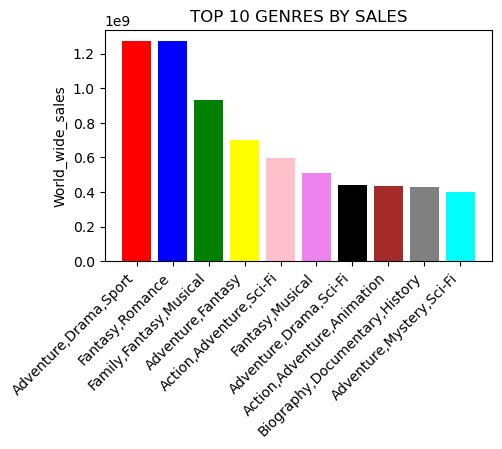

In [51]:
# summary of sales per genre:
fig, ax = plt.subplots(figsize=(5,3))
ax.bar(Top10_genres_by_sales['genres'],Top10_genres_by_sales['worldwide_gross'],color=['red', 'blue', 'green', 'yellow', 'pink', 
                                 'violet', 'black', 'brown', 'grey', 'cyan'])
ax.set_ylabel('World_wide_sales')
ax.set_title('TOP 10 GENRES BY SALES')
plt.xticks(rotation=45,ha='right')
plt.show()

All the top 10 most profitable genres based on return on investement do not feature in the top ten movies by global sales.  
Genres with top 10 sales are not the most profitale to invest in.

### Summary by top 10 movies in sales and ROI

In [52]:
# Getting top 10 movies by sales:
Top10_movies_by_sales=movie_details_and_budget.groupby ('primary_title')['worldwide_gross'].mean().sort_values(ascending=False).head(10).reset_index()
Top10_movies_by_sales.head(10)

,primary_title,worldwide_gross
0,Avatar,2.776345e+09
1,Titanic,2.208208e+09
2,Avengers: Infinity War,2.048134e+09
3,Jurassic World,1.648855e+09
4,Furious 7,1.518723e+09
5,Avengers: Age of Ultron,1.403014e+09
6,Black Panther,1.348258e+09
7,Jurassic World: Fallen Kingdom,1.305773e+09
8,Frozen,1.272470e+09
9,Incredibles 2,1.242521e+09


In [53]:
# Getting top 10 movies by ROI:
ROI_by_movies=movie_details_and_budget.groupby ('primary_title')['ROI'].mean().sort_values(ascending=False).head(10).reset_index()
ROI_by_movies.head(10)

,primary_title,ROI
0,The Gallows,41556.474000
1,Bambi,31135.431235
2,Rocky,22400.000000
3,Night of the Living Dead,13165.547928
4,The Devil Inside,10075.949000
5,Graduation Day,9457.600000
6,Halloween,8101.410294
7,Insidious,6558.059067
8,Unfriended,6336.419800
9,Benji,6211.912000


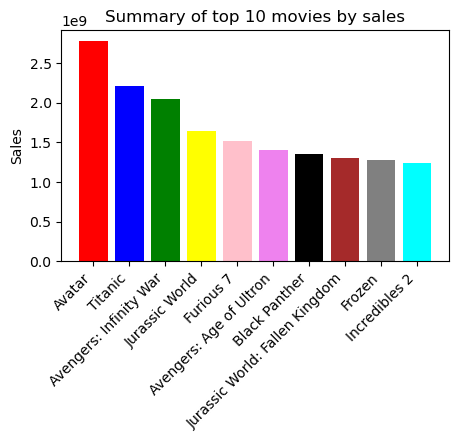

In [54]:
#plotting top 10 movies by sales:
fig, ax = plt.subplots(figsize=(5,3))
ax.bar(Top10_movies_by_sales['primary_title'],Top10_movies_by_sales['worldwide_gross'],color=['red', 'blue', 'green', 'yellow', 'pink', 
                                 'violet', 'black', 'brown', 'grey', 'cyan'])
ax.set_ylabel('Sales')
ax.set_title('Summary of top 10 movies by sales')
plt.xticks(rotation=45,ha='right')
plt.show()


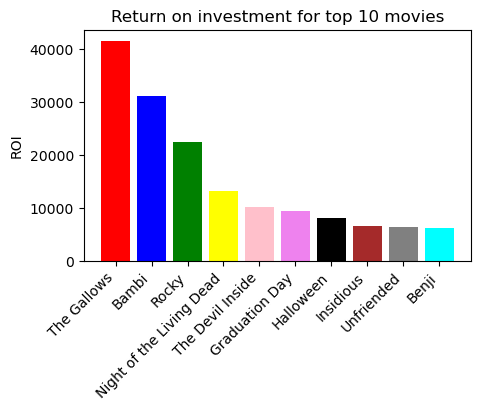

In [55]:
# summary of top 10 movies by ROI:
fig, ax = plt.subplots(figsize=(5,3))
ax.bar(ROI_by_movies['primary_title'],ROI_by_movies['ROI'],color=['red', 'blue', 'green', 'yellow', 'pink', 
                                 'violet', 'black', 'brown', 'grey', 'cyan'])
ax.set_ylabel('ROI')
ax.set_title('Return on investment for top 10 movies')
plt.xticks(rotation=45,ha='right')
plt.show()

The top 10 movies in sales are also not the top 10 best movies to invest in based on the return on investment.  

Best sales does not imply best returns.

# 3.0 Visualizing relationships that may influence sales or profits 

## 3.1 Plotting distribution of variables

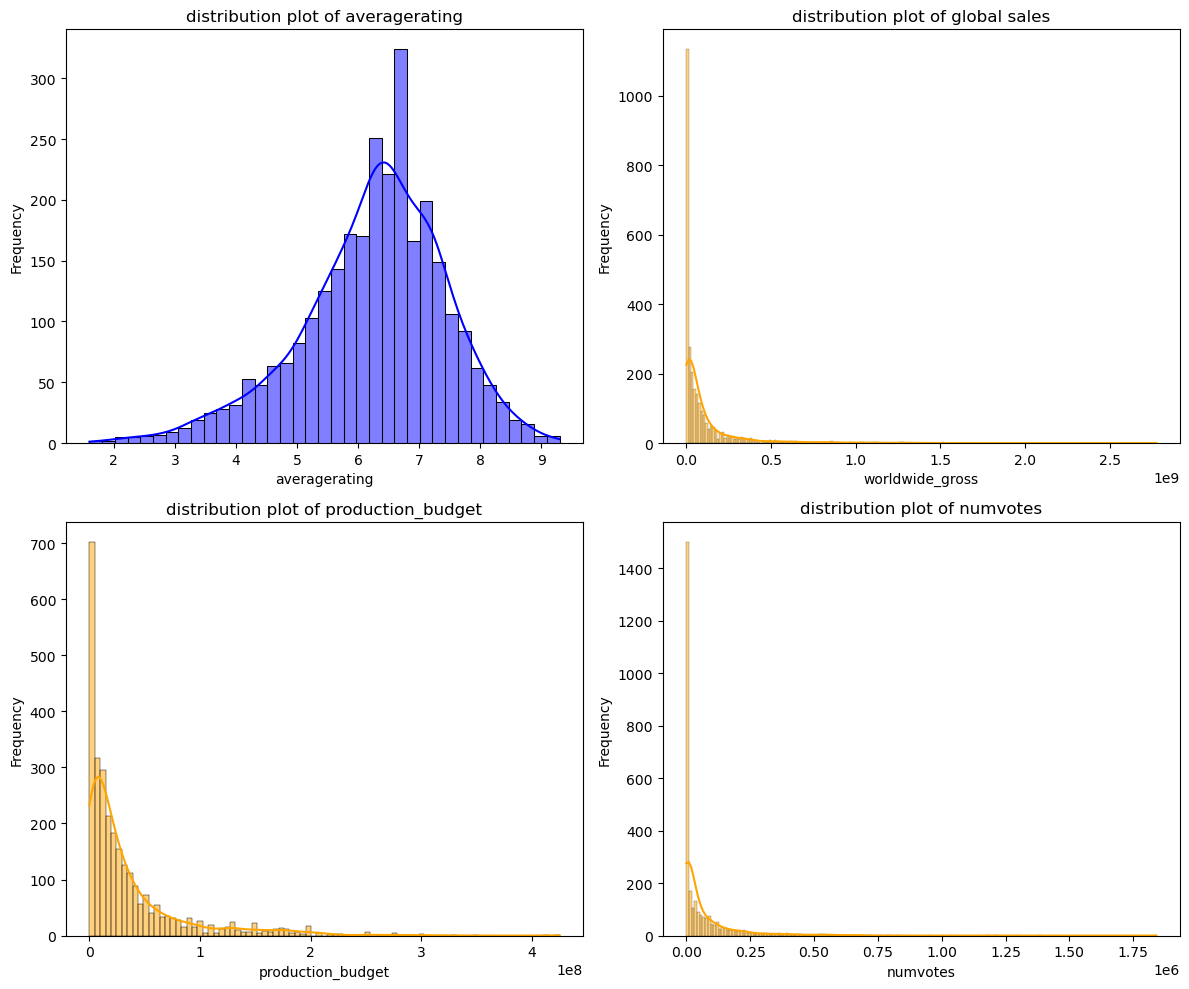

In [56]:
#Plotting a histogram to check distribution of average rating,net profit
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# showing distribution of averagerating
sns.histplot(movie_details_and_budget['averagerating'], kde=True, ax=axes[0, 0],color='blue')
axes[0, 0].set_title('distribution plot of averagerating')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(movie_details_and_budget['worldwide_gross'], kde=True, ax=axes[0, 1],color='orange')
axes[0, 1].set_title('distribution plot of global sales')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(movie_details_and_budget['production_budget'], kde=True, ax=axes[1, 0],color='orange')
axes[1, 0].set_title('distribution plot of production_budget')
axes[1, 0].set_ylabel('Frequency')



sns.histplot(movie_details_and_budget['numvotes'], kde=True, ax=axes[1, 1],color='orange')
axes[1, 1].set_title('distribution plot of numvotes')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Average rating across the movies has a normal distribution.

## 3.2 Satter plots for relationship testing

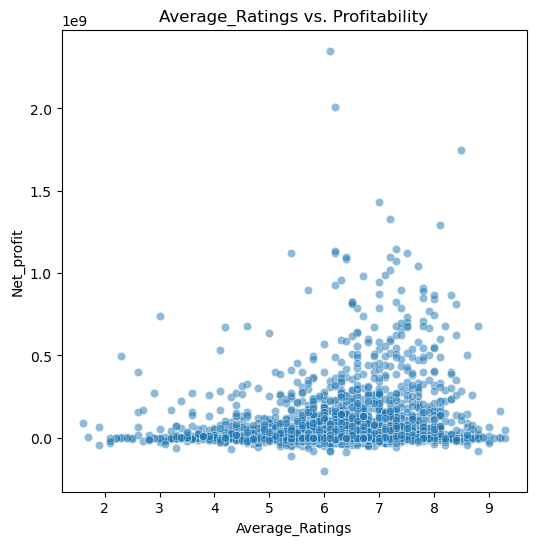

In [57]:
#scatter plot to test relationship between rating and profitability:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=movie_details_and_budget, x="averagerating", y="Net_profit", alpha=0.5)
plt.title("Average_Ratings vs. Profitability")
plt.xlabel("Average_Ratings")
plt.ylabel("Net_profit")
plt.show()

Based on the above plot, movies with higher rating tend to have more profitability.

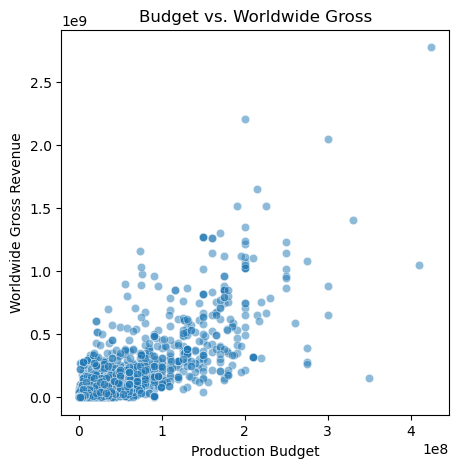

In [58]:
# To visualize relationship between  production cost and global revenue:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=movie_details_and_budget, x="production_budget", y="worldwide_gross", alpha=0.5)
plt.title("Budget vs. Worldwide Gross")
plt.xlabel("Production Budget")
plt.ylabel("Worldwide Gross Revenue")
plt.show()

Most movies spent less funds on production budget and consequently registered lowere sales.

## 3.3 Testing for relationships through regression analysis

 The correlation between averagerating and global sales is 0.1656747821700334


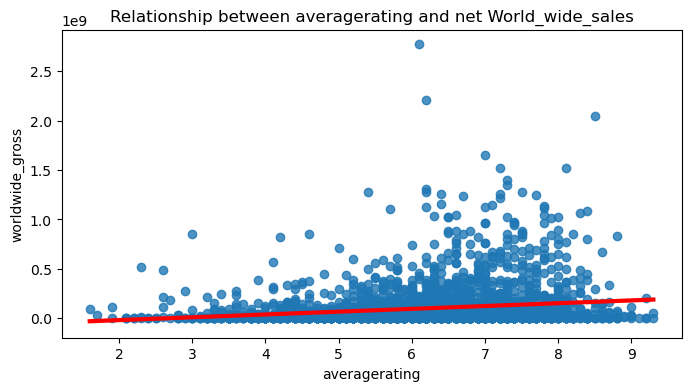

In [59]:
#Testing if there is correlation between production budget and Netprofit
plt.figure(figsize=(8,4))
sns.regplot(x=movie_details_and_budget['averagerating'], y=movie_details_and_budget['worldwide_gross'] ,
            line_kws={'color':'red','linewidth':3,'linestyle':'-'})
correlation=(movie_details_and_budget['averagerating']).corr (movie_details_and_budget['worldwide_gross'])
plt.title ('Relationship between averagerating and net World_wide_sales')
print (f' The correlation between averagerating and global sales is {correlation}')

There is a weak positive correlation between average rating and global sales.   Investing in quality movies that will attract higher ratings will have a moderate postive impact on the global sales

## 4.0 Hypotheis testing 

### 4.1 Impact of ratings on sales

**Hypothesis testing if movie rating impacts on worlwide sales**   
H0=Average rating has no impact on the worldwide  film sales   
H1=Average rating has an impact on the worldwide film sales    


In [60]:
#testing impact of average rating on sales
X=movie_details_and_budget['averagerating']
y=movie_details_and_budget['worldwide_gross']
X=sm.add_constant(X)
#Fititng the model
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     81.08
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           3.85e-19
Time:                        10:37:17   Log-Likelihood:                -59044.
No. Observations:                2875   AIC:                         1.181e+05
Df Residuals:                    2873   BIC:                         1.181e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.492e+07   2.01e+07     -3.727

**Insight made**  

At R-squared of 2.7%, the average rating can influence the global sales by 2.7%.Hence rating impacts sales postively with a relatively low impact.  

With a P value of 0.00 which is less than 0.05% we fail to accept the null hypothesis and conclude that movie ratings have an impact on global sales.

 The correlation between production_budget and World_wide_sales is 0.1656747821700334


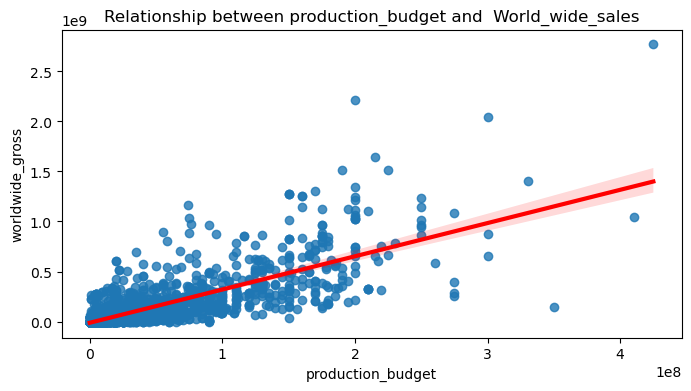

In [64]:
#Regression analysis of production budget and worldwide sales:
plt.figure(figsize=(8,4))
sns.regplot(x=movie_details_and_budget['production_budget'], y=movie_details_and_budget['worldwide_gross'] ,
            line_kws={'color':'red','linewidth':3,'linestyle':'-'})
correlation=(movie_details_and_budget['averagerating']).corr (movie_details_and_budget['worldwide_gross'])
plt.title ('Relationship between production_budget and  World_wide_sales')
print (f' The correlation between production_budget and World_wide_sales is {correlation}')



**Hypothesis testing if movie production budgets impacts on worlwide sales**   
H0=production budget has no impact on the worldwide  film sales   
H1=production has an impact on the worldwide film sales  

In [62]:
#testing impact of production budget on sales
X=movie_details_and_budget['production_budget']
y=movie_details_and_budget['worldwide_gross']
X=sm.add_constant(X)
#Fititng the model
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     4400.
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:37:17   Log-Likelihood:                -57749.
No. Observations:                2875   AIC:                         1.155e+05
Df Residuals:                    2873   BIC:                         1.155e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.113e+07   2.94e+0

**Insight made**  

As seen above, production  budget has a strong impact on global sales wit an Rsquared of  0.605 . This means that production budget influences up to 60.5% of the global sales.  
with a P value of 0.00 , we fail to accept the null hypotheis and conclude that spending more on production budget would have an impact on the sales made.  


# 5.0 Conclusion

We conclude that:
For our company to  make a profitable investment, we should focus on producing movies  centred in the below grenes base on ROI:     
  Biography,Documentary    	
  Drama,Family,Fantasy  	
  Crime,Drama,Family  	
  Action,Drama,Romance  	
  Action,Comedy,Drama	  
  Horror,Romance,Thriller  	
  Horror,Mystery,Thriller  	
  Crime  	
  Crime,Fantasy,Thriller  	
  Comedy,Romance,Sport  	

To acheive maximum returns, the compnay should spend more on production costs as this may impact up to 60.5% of the sales made.

The comany should also focus on  quality films which would attract higher ratings in the market. Higher ratings would also drive the company's sales up by up to 2.7%

